In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst

In [2]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_ekf,  u_ekf,  theta_ekf,  theta_hat_ekf  = param_est.simulate_quadrotor_hover_with_EKF()
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS()
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA()


# Suppose x_deka, x_rls each have shape (N, 3) for position in x,y,z.
# Also assume you have a desired (reference) trajectory x_des, shape (N, 3).
num_points = 600
angles = np.linspace(0, 6*np.pi, num_points, endpoint=False)
# Create the figure-8 in the XY-plane
x = np.sin(angles)
y = np.sin(2 * angles)
z = np.zeros_like(x)  # Initially flat in XY-plane

# Stack as a (3, num_points) matrix
traj = np.vstack((x, y, z))  # Shape: (3, num_points)

# Define rotation matrix (tilt around the Y-axis)
rot_ang= np.radians(30)  # Tilt angle in degrees
R = np.array([
    [np.cos(rot_ang), 0, np.sin(rot_ang)],  # Rotation matrix for X-Z plane
    [0, 1, 0],  # Keep Y unchanged
    [-np.sin(rot_ang), 0, np.cos(rot_ang)]
])

# Apply rotation
traj_rotated = (R @ traj).T  # Matrix multiplication
x_des = traj.T  # Transpose back to original shape
# 2) Plot x, y, z positions for DEKA vs RLS vs desired
t = np.arange(len(x_deka))  # time steps 0..N-1


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
step:  0 

step:  1 

step:  2 

step:  3 

step:  4 

step:  5 

step:  6 

step:  7 

step:  8 

step:  9 

step:  10 

step:  11 

step:  12 

step:  13 

step:  14 

step:  15 

step:  16 

step:  17 

step:  18 

step:  19 

step:  20 

step:  21 

step:  22 

step:  23 

step:  24 

step:  25 

step:  26 

step:  27 

step:  28 

step:  29 

step:  30 

step:  31 

step:  32 

step:  33 

step:  34 

step:  35 

step:  36 

step:  37 

step:  38 

step:  39 

step:  40 

step:  41 

step:  42 

step:  43 

step:  44 

step:  45 

step:  46 

step:  47 

step:  48 

step:  49 

step:  50 

step:  51 

step:  52 

step:  53 

step:  54 

step:  55 

step:  56 

step:  57 

step:  58 

step:  59 

step:  60 

step:  61 

step:  62 

step:  63 

step:  64 

step:  65 

step:  66 

ste

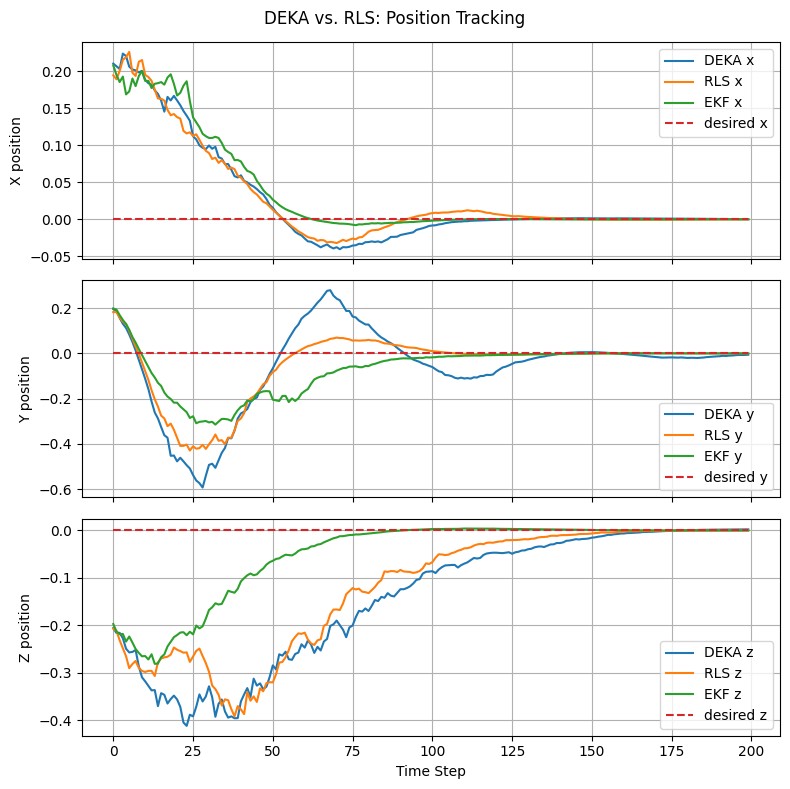

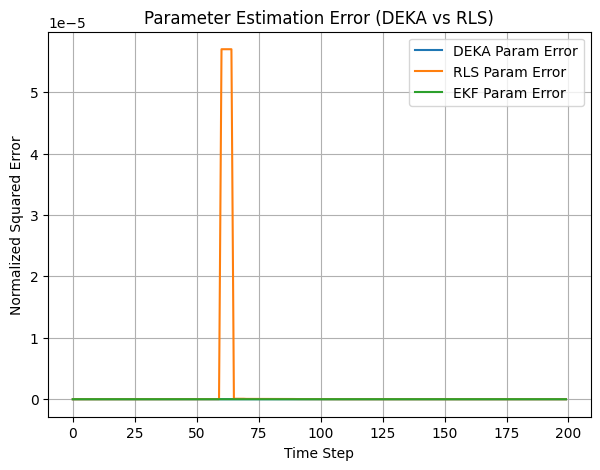

In [3]:
x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_ekf   = [row[0] for row in x_ekf]
x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_ekf   = [row[1] for row in x_ekf]
y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_ekf   = [row[2] for row in x_ekf]
z_pos_des   = [row[2] for row in x_des][:200]

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_ekf)
theta_ekf_array = np.array(theta_ekf)

fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
# X position
axs[0].plot(t, x_pos_deka, label='DEKA x')
axs[0].plot(t, x_pos_rls, label='RLS x')
axs[0].plot(t, x_pos_ekf, label='EKF x')
axs[0].plot(t, np.zeros_like(t), '--', label='desired x')
axs[0].set_ylabel('X position')
axs[0].legend()
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, label='DEKA y')
axs[1].plot(t, y_pos_rls, label='RLS y')
axs[1].plot(t, y_pos_ekf, label='EKF y')
axs[1].plot(t, np.zeros_like(t), '--', label='desired y')
axs[1].set_ylabel('Y position')
axs[1].legend()
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, label='DEKA z')
axs[2].plot(t, z_pos_rls, label='RLS z')
axs[2].plot(t, z_pos_ekf, label='EKF z')
axs[2].plot(t, np.zeros_like(t), '--', label='desired z')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Z position')
axs[2].legend()
axs[2].grid(True)

fig.suptitle('DEKA vs. RLS: Position Tracking')
plt.tight_layout()
plt.show()

# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
                   / np.sum(theta_deka_array**2, axis=1)
param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
                   / np.sum(theta_rls_array**2, axis=1)
param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
                   / np.sum(theta_ekf_array**2, axis=1)
# For each time i, compute MSE across parameters
mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

plt.figure(figsize=(7,5))
plt.plot(t, mse_deka_time, label='DEKA Param Error')
plt.plot(t, mse_rls_time,  label='RLS Param Error')
plt.plot(t, mse_ekf_time,  label='EKF Param Error')


plt.xlabel('Time Step')
plt.ylabel('Normalized Squared Error')
plt.title('Parameter Estimation Error (DEKA vs RLS)')
plt.grid(True)
plt.legend()
plt.show()


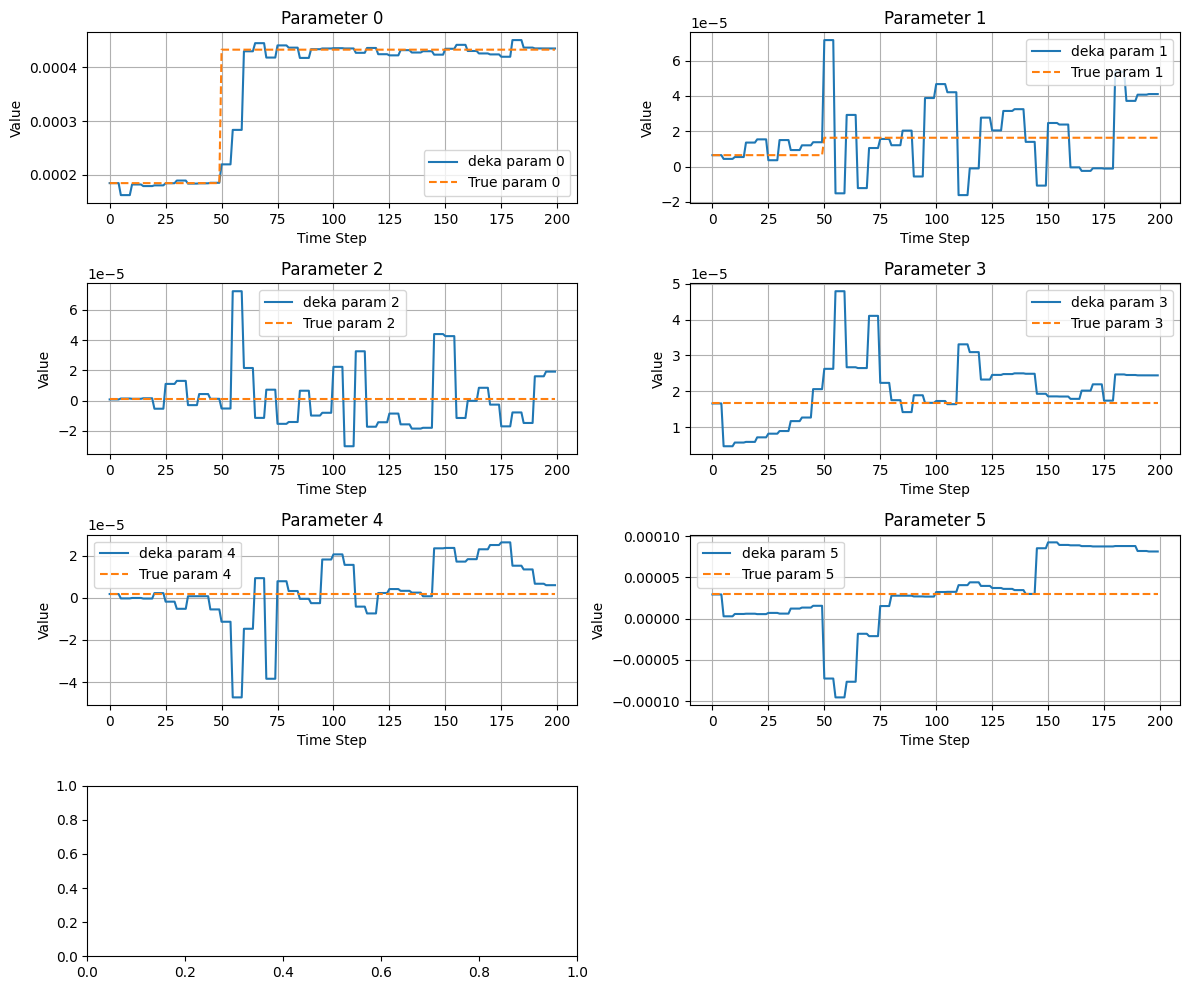

In [4]:

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_deka_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)

plt.tight_layout()
plt.show()


## Simulate 100 times to obtain average mse comparison 

In [ ]:
import numpy as np

num_runs = 100

mse_deka_list = []
mse_rls_list  = []
mse_ekf_list  = []

for run_idx in range(num_runs):
    # 1) Run your three simulations
    x_deka,  u_deka,  theta_deka,  theta_hat_deka   = param_est.simulate_quadrotor_tracking_with_DEKA()
    x_rls,   u_rls,   theta_rls,   theta_hat_rls    = param_est.simulate_quadrotor_tracking_with_RLS()
    x_ekf,   u_ekf,   theta_ekf,   theta_hat_ekf    = param_est.simulate_quadrotor_tracking_with_EKF()
    
    # 2) Convert lists to arrays (if needed)
    theta_deka_array     = np.array(theta_deka)
    theta_hat_deka_array = np.array(theta_hat_deka)
    theta_rls_array      = np.array(theta_rls)
    theta_hat_rls_array  = np.array(theta_hat_rls)
    theta_ekf_array      = np.array(theta_ekf)
    theta_hat_ekf_array  = np.array(theta_hat_ekf)

    # 3) Compute MSE for each method in this run
    #    (One single MSE across all time steps & parameters)
    mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2)
    mse_rls  = np.mean((theta_hat_rls_array  - theta_rls_array)**2)
    mse_ekf  = np.mean((theta_hat_ekf_array  - theta_ekf_array)**2)

    # 4) Append them to lists for averaging later
    mse_deka_list.append(mse_deka)
    mse_rls_list.append(mse_rls)
    mse_ekf_list.append(mse_ekf)

# 5) After num_runs, compute average MSE
avg_mse_deka = np.mean(mse_deka_list)
avg_mse_rls  = np.mean(mse_rls_list)
avg_mse_ekf  = np.mean(mse_ekf_list)

# 6) Print or store these results
print("Average MSE (DEKA):", avg_mse_deka)
print("Average MSE (RLS): ", avg_mse_rls)
print("Average MSE (EKF): ", avg_mse_ekf)


Perturbed Intitial State: 
[0.           0.           0.           0.7071067812 0.7071067812
 0.           0.           0.           0.           0.
 0.           0.           0.          ]
step:  0 
 prediction_err:  0.25754615390839886 

step:  1 
 prediction_err:  0.0007875217749866575 

tol reached
step:  2 
 prediction_err:  0.0006219679493424281 

tol reached
step:  3 
 prediction_err:  0.0005373601292297049 

tol reached
step:  4 
 prediction_err:  0.0005373601292297049 

tol reached
step:  5 
 prediction_err:  0.0001016873522067599 

tol reached
step:  6 
 prediction_err:  0.0001016873522067599 

tol reached
step:  7 
 prediction_err:  0.0001016873522067599 

tol reached
step:  8 
 prediction_err:  0.0001016873522067599 

tol reached
step:  9 
 prediction_err:  0.0001016873522067599 

tol reached
step:  10 
 prediction_err:  0.0001016873522067599 

tol reached
step:  11 
 prediction_err:  0.0001016873522067599 

tol reached
step:  12 
 prediction_err:  0.0001016873522067599 

t